In [46]:
import pandas as pd
# imports
from fastai import *
from fastai.vision import *
from shutil import copyfile
import seaborn as sns
from pathlib import Path


In [12]:
# from fastai.vision import *
# from fastai.metrics import error_rate
# from fastai.basics import URLs, untar_data

# # Define the URL of the food-101 dataset
# food_url = URLs.FOOD

# # Download and extract the dataset
# path = untar_data(food_url)

In [6]:
import pandas as pd

train_path = 'F:\\Data Science\\GitHub\\Computer-Vision\\Data\\data\\food-101\\train.txt'
test_path = 'F:\\Data Science\\GitHub\\Computer-Vision\\Data\\data\\food-101\\test.txt'

def filelist2df(path):
    df = pd.read_csv(path, delimiter='/', header=None, names=['label', 'name'])
    df['name'] = df['label'].astype(str) + "/" + df['name'].astype(str) + ".jpg"
    return df

train_df = filelist2df(train_path)

test_df = filelist2df(test_path)


### 1. Data Preparation
    - Load the Food-101 dataset.
    - Preprocess the data (e.g., resizing, normalization, etc.).
    - Split the dataset into training, validation, and testing sets.

In [106]:
# Load the Food-101 dataset
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# Define the directory where the dataset is located
data_dir = '../../Data/data/food-101/images'

# Define the transformations to be applied to the input images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 pixels
    transforms.ToTensor(),  # Convert images to tensors
])

# Load the dataset and apply the transformations
dataset = ImageFolder(root=data_dir, transform=transform)


In [107]:
# Preprocess the data
# Perform normalization (mean and standard deviation) on the dataset
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 pixels
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean, std)  # Normalize images
])

# Load the dataset and apply the transformations
dataset = ImageFolder(root=data_dir, transform=transform)


In [108]:
# Split the dataset into training, validation, and testing sets
from torch.utils.data import random_split

# Define the sizes of the training, validation, and testing sets
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

# Split the dataset into training, validation, and testing sets
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create data loaders for the training, validation, and testing sets
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)
test_loader = DataLoader(test_dataset, batch_size=8)


In [95]:
# Class Labels
class_names = dataset.classes
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [96]:
# Count the Number of Images in Each Category
category_counts = {}
for cls in class_names:
    category_counts[cls] = len(os.listdir(os.path.join(data_dir, cls)))

category_counts


{'apple_pie': 1000,
 'baby_back_ribs': 1000,
 'baklava': 1000,
 'beef_carpaccio': 1000,
 'beef_tartare': 1000,
 'beet_salad': 1000,
 'beignets': 1000,
 'bibimbap': 1000,
 'bread_pudding': 1000,
 'breakfast_burrito': 1000,
 'bruschetta': 1000,
 'caesar_salad': 1000,
 'cannoli': 1000,
 'caprese_salad': 1000,
 'carrot_cake': 1000,
 'ceviche': 1000,
 'cheese_plate': 1000,
 'cheesecake': 1000,
 'chicken_curry': 1000,
 'chicken_quesadilla': 1000,
 'chicken_wings': 1000,
 'chocolate_cake': 1000,
 'chocolate_mousse': 1000,
 'churros': 1000,
 'clam_chowder': 1000,
 'club_sandwich': 1000,
 'crab_cakes': 1000,
 'creme_brulee': 1000,
 'croque_madame': 1000,
 'cup_cakes': 1000,
 'deviled_eggs': 1000,
 'donuts': 1000,
 'dumplings': 1000,
 'edamame': 1000,
 'eggs_benedict': 1000,
 'escargots': 1000,
 'falafel': 1000,
 'filet_mignon': 1000,
 'fish_and_chips': 1000,
 'foie_gras': 1000,
 'french_fries': 1000,
 'french_onion_soup': 1000,
 'french_toast': 1000,
 'fried_calamari': 1000,
 'fried_rice': 1000

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


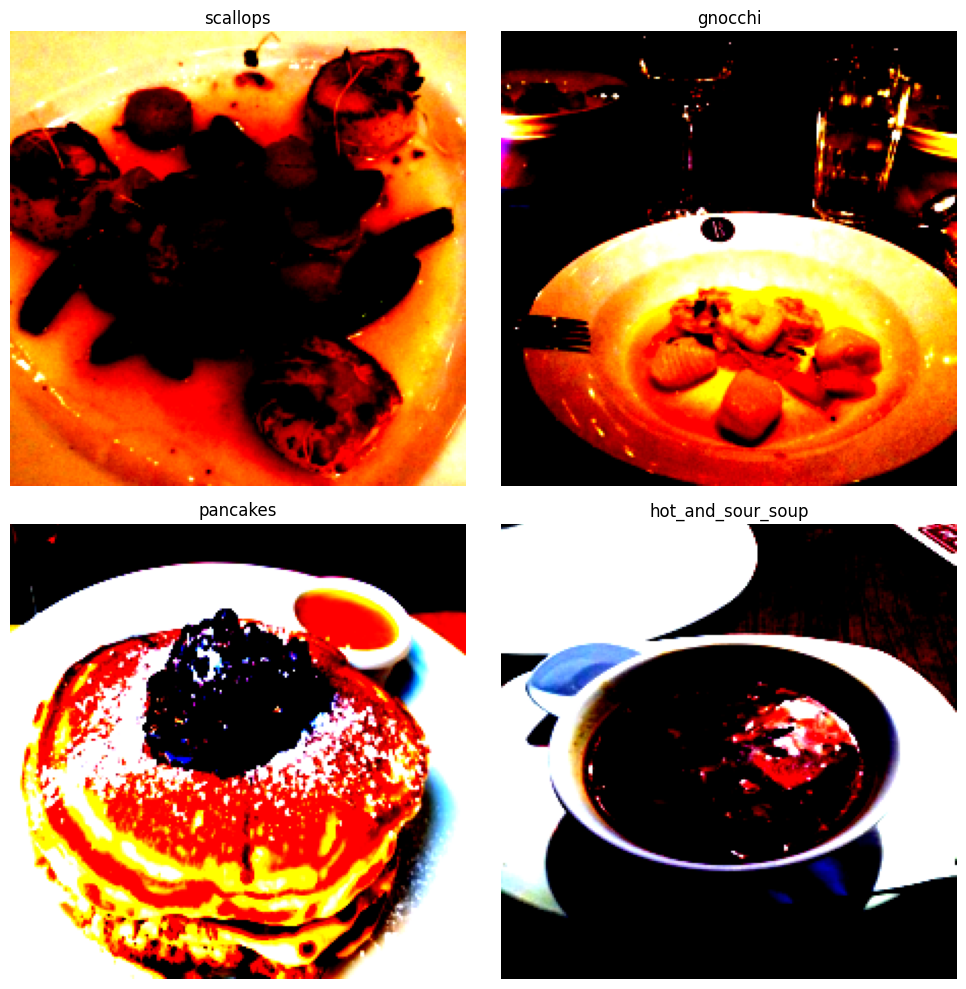

In [97]:
# Visualize Some Sample Images
import matplotlib.pyplot as plt
import numpy as np

# Select a random sample of images
sample_indices = np.random.choice(len(dataset), size=4, replace=False)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for idx, ax in zip(sample_indices, axes.flat):
    image, label = dataset[idx]
    ax.imshow(image.permute(1, 2, 0).numpy())
    ax.set_title(class_names[label])
    ax.axis('off')

plt.tight_layout()
plt.show()


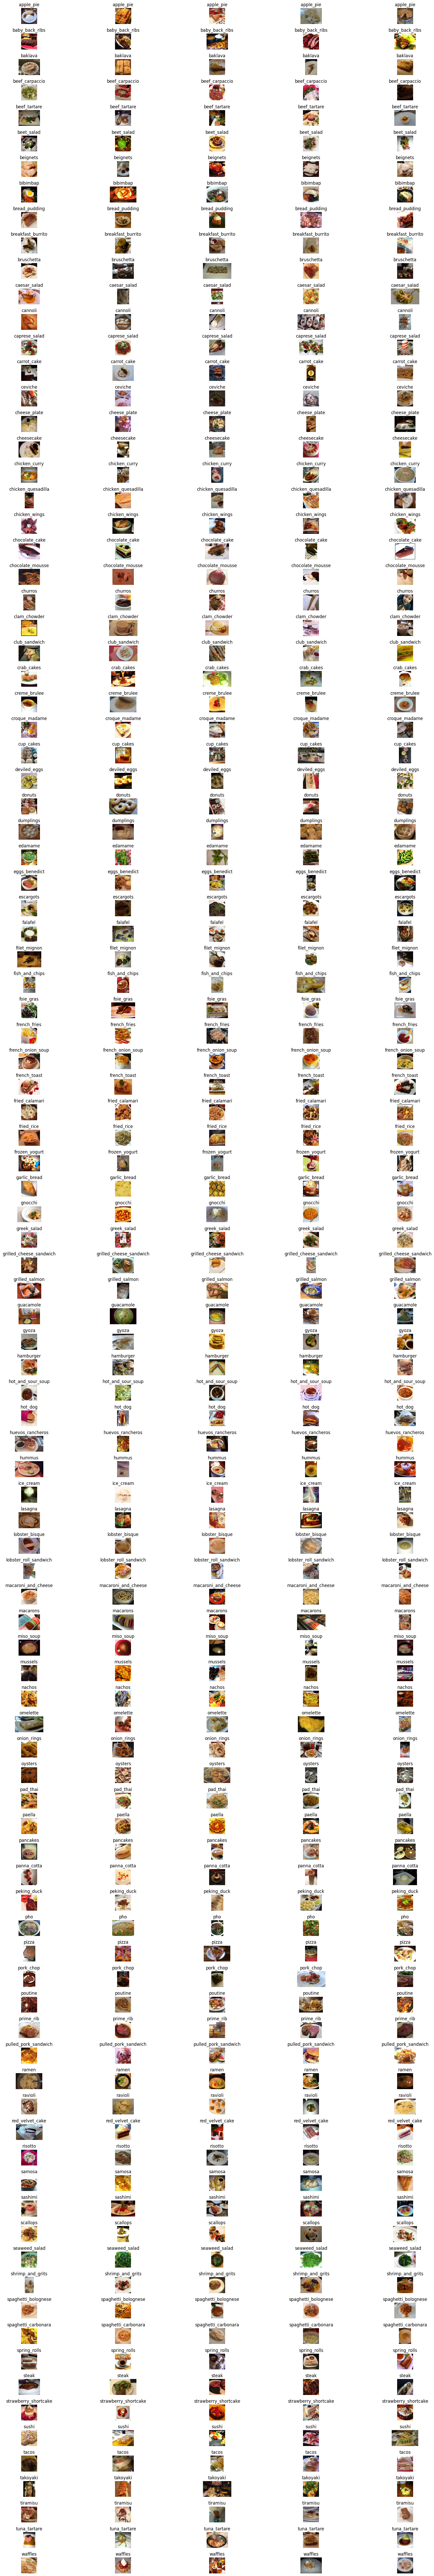

In [89]:
# Display Random Images from Each Category
import random

# Define the number of images to display from each category
num_images_per_category = 5

# Create a figure and axes to display the images
fig, axes = plt.subplots(nrows=len(class_names), ncols=num_images_per_category, figsize=(20, 100))

# Loop over each category
for i, cls in enumerate(class_names):
    # Get the list of image filenames in the category
    image_filenames = os.listdir(os.path.join(data_dir, cls))
    # Randomly select the specified number of images
    selected_images = random.sample(image_filenames, num_images_per_category)
    # Loop over the selected images and display them
    for j, image_filename in enumerate(selected_images):
        image_path = os.path.join(data_dir, cls, image_filename)
        image = plt.imread(image_path)
        axes[i, j].imshow(image)
        axes[i, j].axis('off')
        axes[i, j].set_title(cls)

plt.tight_layout()
plt.show()


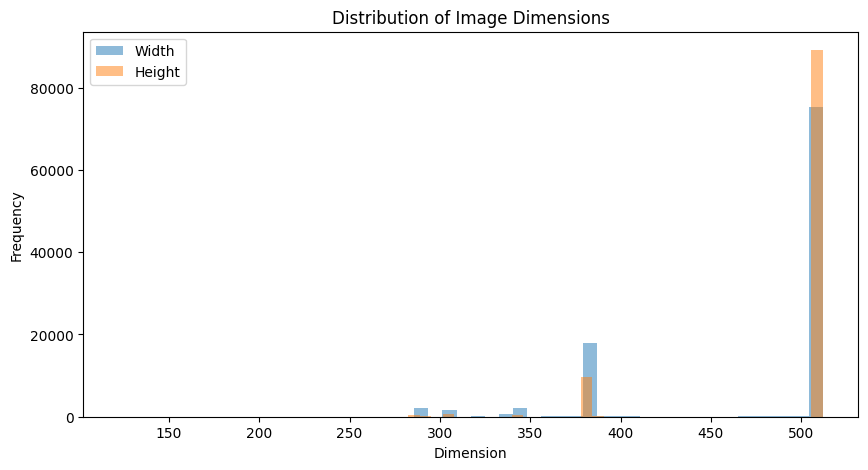

In [59]:
# Visualize Image Dimensions
image_dimensions = []

for cls in class_names:
    for image_filename in os.listdir(os.path.join(data_dir, cls)):
        image_path = os.path.join(data_dir, cls, image_filename)
        image = plt.imread(image_path)
        image_dimensions.append(image.shape[:2])

image_dimensions = np.array(image_dimensions)

plt.figure(figsize=(10, 5))
plt.hist(image_dimensions[:, 0], bins=50, alpha=0.5, label='Width')
plt.hist(image_dimensions[:, 1], bins=50, alpha=0.5, label='Height')
plt.xlabel('Dimension')
plt.ylabel('Frequency')
plt.title('Distribution of Image Dimensions')
plt.legend()
plt.show()


### 2. Model Architecture
    - Define the architecture of the CNN model using PyTorch.
    - Choose appropriate activation functions and loss functions.
    - Select an optimization algorithm (e.g., Adam, SGD, etc.).

In [109]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

In [110]:
# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 101)  # 101 is the number of classes in the Food-101 dataset

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = SimpleCNN()

# Choose an appropriate activation function and loss function
criterion = nn.CrossEntropyLoss()

# Choose an optimization algorithm (e.g., Adam, SGD)
optimizer = optim.Adam(model.parameters(), lr=0.001)


### 3. Model Training
    - Train the model on the training set.
    - Utilize the validation set to monitor performance and prevent overfitting.
    - Tune hyperparameters (e.g., learning rate, batch size, etc.) as needed.


In [111]:
# Define the model and optimizer
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18

# Define the model architecture
model = resnet18(num_classes=101)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [112]:
num_samples = len(train_dataset)  # Number of samples in the training dataset
  # Batch size

total_batches = num_samples // batch_size  # Total number of batches in one epoch
print(f'Total number of batches in one epoch: {total_batches}')


Total number of batches in one epoch: 8837


In [114]:
num_samples, batch_size

(70700, 8)

In [118]:
import psutil

# Get CPU information
cpu_count = psutil.cpu_count(logical=False)  # Number of physical cores
cpu_info = psutil.cpu_freq()  # CPU frequency

# Get memory information
mem_info = psutil.virtual_memory()  # Total memory available

# Print the results
print(f'CPU Count: {cpu_count}')
print(f'CPU Frequency: {cpu_info.current:.2f} MHz')
print(f'Total Memory: {mem_info.total / (1024 ** 3):.2f} GB')


CPU Count: 2
CPU Frequency: 3300.00 MHz
Total Memory: 7.96 GB


In [116]:
num_epochs = 1  # Number of training epochs

for epoch in range(num_epochs):
    running_loss = 0.0
    inputs, labels = next(iter(train_loader))  # Get the entire dataset
    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 100 == 99:    # Print every 100 mini-batches
        print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.4f}')
        running_loss = 0.0


In [115]:
num_epochs = 1  # Number of training epochs
batch_size = 4  # Size of mini-batches

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:    # Print every 1000 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 1000:.4f}')
            running_loss = 0.0

Epoch 1, Batch 100, Loss: 5.0386
Epoch 1, Batch 200, Loss: 4.7260
Epoch 1, Batch 300, Loss: 4.6896
Epoch 1, Batch 400, Loss: 4.6875
Epoch 1, Batch 500, Loss: 4.6196
Epoch 1, Batch 600, Loss: 4.6308
Epoch 1, Batch 700, Loss: 4.5958
Epoch 1, Batch 800, Loss: 4.5989
Epoch 1, Batch 900, Loss: 4.5724
Epoch 1, Batch 1000, Loss: 4.5667
Epoch 1, Batch 1100, Loss: 4.5724


KeyboardInterrupt: 

In [117]:
# Validate the model
correct = 0
total = 0

with torch.no_grad():
    for data in val_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Validation Accuracy: {100 * correct / total:.2f}%')


KeyboardInterrupt: 

### 4. Model Evaluation
    - Evaluate the trained model on the test set.
    - Calculate relevant metrics such as accuracy, precision, recall, and F1-score.
    - Visualize the results (e.g., confusion matrix, classification report, etc.).


In [ ]:
# Evaluate the trained model on the test set
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')


In [ ]:
# Calculate relevant metrics
from sklearn.metrics import accuracy_score

# Convert the predicted and true labels from tensors to numpy arrays
predicted_np = predicted.numpy()
labels_np = labels.numpy()

# Calculate accuracy using Scikit-learn
test_accuracy = accuracy_score(labels_np, predicted_np)
print(f'Test Accuracy: {test_accuracy:.2f}%')


In [ ]:
# Visualize the results
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(labels_np, predicted_np)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### 5. Model Deployment (Optional)
    - Save the trained model for future use.
    - Deploy the model for inference on new data (e.g., using PyTorch's deployment tools).
